In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
from utils.data import read_pickle, load_network
from utils.vis import reorder_cluster_ids, plot_raster, vis_heatmap, import_camera_ready_settings
from seaborn import heatmap

network_df = load_network()
obs_1ms_df = network_df.apply(lambda x: x.sum(0))
n_trials_1ms_df = network_df.apply(lambda x: x.shape[0])

n_ms = 10
obs_all = obs_1ms_df.apply(lambda x: x.reshape((-1, n_ms)).sum(1)).values.tolist()
n_trials_all = n_trials_1ms_df.values * n_ms
cue_time = 500 // n_ms

In [4]:
#import_camera_ready_settings()

In [17]:
out = read_pickle('../pickle/sim_shift32.p')
cluster_ids, cluster_params, n_clusters = reorder_cluster_ids(*out)

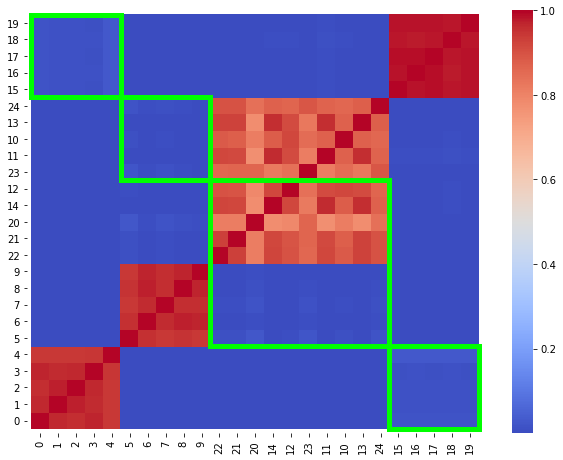

In [18]:
burnin = 1000
sim_mat, all_best_gibbs, all_sim_mats = vis_heatmap(cluster_ids[burnin:])
# plt.savefig('../img/cue.pdf')

In [19]:
all_best_idx = burnin + all_best_gibbs

In [20]:
np.mean(np.dstack([cluster_params[i] for i in all_best_idx]), axis=2).round(3)

array([[  6.53000000e-01,  -1.07910000e+01],
       [ -7.65000000e-01,  -1.24770000e+01],
       [  5.00000000e-03,  -9.36300000e+00],
       [  5.69000000e-01,  -5.47400000e+00]])

In [ ]:
cluster_params

[array([[ -0.62311099,  -3.30970772],
        [  0.44338258,  -6.32117111],
        [ -0.76759211, -10.01232815],
        [ -0.23594936, -14.8356432 ],
        [ -0.13642669, -13.77572272],
        [ -0.91045694,  -6.18448133],
        [  0.86678523,  -7.53996192]]), array([[ -3.42757834,  -1.0307116 ],
        [ -0.76759211, -10.01232815],
        [ -0.23594936, -14.8356432 ],
        [  0.25650012,  -2.02057694],
        [ -0.28499048, -10.78490961],
        [ -0.0608954 , -11.46693437],
        [  0.05614618, -10.63659961],
        [ -2.60565749, -10.43639641]]), array([[  0.27416207, -10.78675472],
        [  0.86532652,  -5.47027085],
        [ -0.76759211, -10.01232815],
        [ -2.60565749, -10.43639641],
        [  0.30744134,  -4.28523127],
        [  0.15653962, -10.87445298],
        [  0.23883718,  -7.10940515]]), array([[  0.43277281,  -5.89530257],
        [ -1.81455486,  -7.7516173 ],
        [ -3.3123254 ,  -6.33440099],
        [ -0.76759211, -10.01232815],
        [

In [10]:
np.dstack([cluster_params[i] for i in all_best_idx]).round(3)

array([[[  0.49 ,   0.562,   0.55 ,   0.58 ,   0.535],
        [ -6.176,  -6.335,  -6.159,  -6.298,  -6.42 ]],

       [[ -0.343,  -0.395,  -0.849,   2.29 ,  -0.54 ],
        [ -2.891,  -2.718, -10.816, -11.246,  -6.33 ]],

       [[ -0.09 ,   0.018,  -0.034,  -0.145,  -0.11 ],
        [ -7.149,  -7.134,  -6.983,  -7.612,  -7.361]],

       [[ -0.762,  -0.696,  -0.914,  -0.562,  -0.585],
        [ -6.452,  -5.99 ,  -6.1  ,  -5.268,  -6.25 ]],

       [[  1.268,   1.318,   1.087,   1.111,   1.245],
        [ -4.808,  -4.898,  -4.209,  -3.76 ,  -4.907]]])

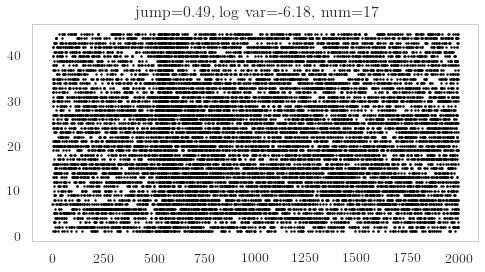

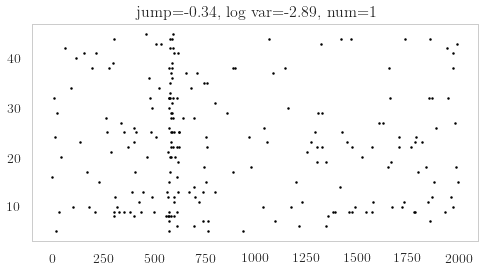

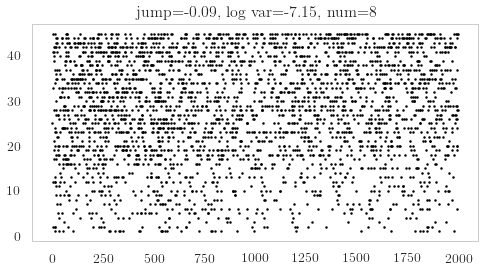

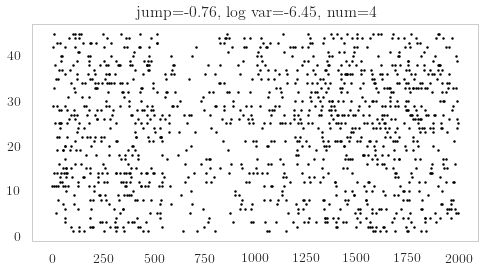

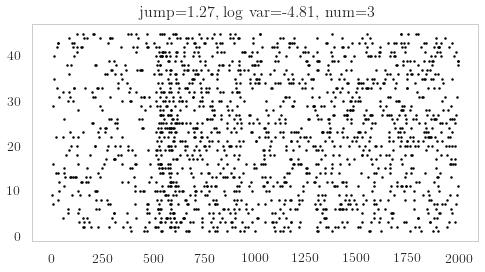

In [12]:
best_idx = all_best_idx[0]
best_ids = cluster_ids[best_idx]
for k in np.unique(best_ids):
    plt.figure(figsize=(8, 4))
    ids = np.arange(33)[best_ids == k]
    for n in ids:
        plot_raster(network_df.iloc[n], ms=5, offset=45-network_df.iloc[n].shape[0])
    plt.title('jump=%.2f, log var=%.2f, num=%d' % (cluster_params[best_idx][k][0], 
                                                   cluster_params[best_idx][k][1], 
                                                   ids.shape[0]))
    plt.show()

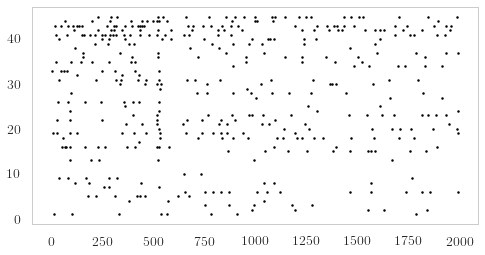

In [44]:
plt.figure(figsize=(8, 4))
n = 31
plot_raster(network_df.iloc[n], ms=5, offset=45-network_df.iloc[n].shape[0])

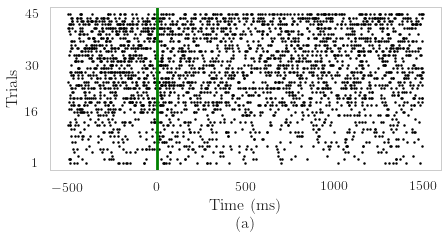

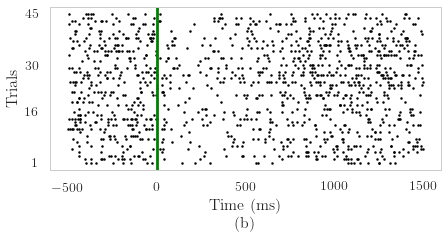

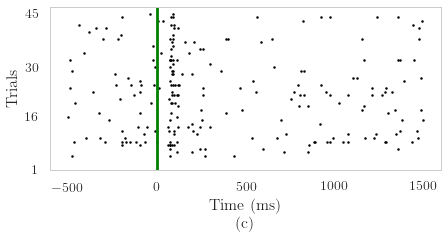

In [17]:
for k, label  in zip([2, 3, 1], ['a', 'b', 'c']):
    plt.figure(figsize=(7, 3))
    ids = np.arange(33)[best_ids == k]
    for n in ids:
        plot_raster(network_df.iloc[n], ms=5, offset=45-network_df.iloc[n].shape[0], 
                    x_axis=np.arange(-500, 1500))
    plt.xticks([-500, 0, 500, 1000, 1500])
    plt.yticks([1, 16, 30, 45])
#     plt.axhline(15.5, c='r')
    plt.axvline(0, c='g')
    plt.xlabel('Time (ms)\n({})'.format(label))
    plt.ylabel('Trials')
    plt.savefig('../img/cue-raster-{}.pdf'.format('app' + str(label)), bbox_inches='tight')

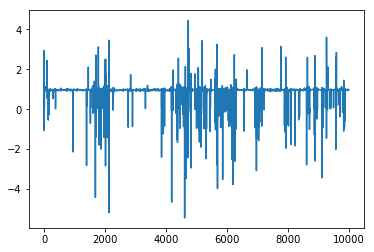

In [20]:
plt.plot([cluster_params[i][cluster_ids[i][0], 0] for i in range(len(cluster_ids))])